## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Loading dataset

In [2]:
df=pd.read_csv('breast_cancer.csv')
X=df.iloc[:,1:-1].values
y=df.iloc[:,-1].values

In [3]:
from sklearn.impute import SimpleImputer
si=SimpleImputer(strategy='median',missing_values=np.nan)
X=si.fit_transform(X)


In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=10)

In [5]:
from sklearn.svm import SVC
svc=SVC(kernel='rbf',degree=3)
svc.fit(X_train,y_train)

SVC()

In [6]:
y_pred=svc.predict(X_test)

In [7]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm1=confusion_matrix(y_test,y_pred)
am1=accuracy_score(y_test,y_pred)
cm2=confusion_matrix(y,svc.predict(X))
am2=accuracy_score(y,svc.predict(X))
print(cm1)
print(am1)
print(cm2)
print(am2)

[[86  3]
 [ 1 47]]
0.9708029197080292
[[432  12]
 [  5 234]]
0.9751098096632503


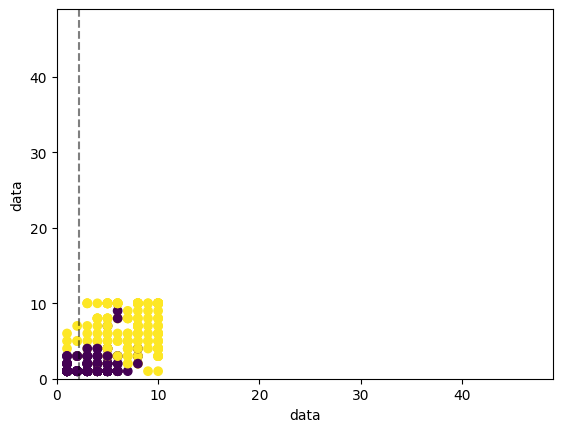

In [10]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis')
ax = plt.gca()
xlim = ax.get_xlim()
plt.xlabel("data")
plt.ylabel("data")
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
plt.contour(xx, yy,  colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
plt.show()